# Regressão Softmax com dados do MNIST utilizando gradiente descendente estocástico por minibatches

O objetivo deste notebook é ilustrar
- o uso do gradiente estocástico por mini-batchs
- utilizando as classes Dataset e DataLoater.

A apresentação da perda nos gráficos é um pouco diferente da usual, mostrando a perda de cada um dos vários minibatches dentro de cada época, de forma que as épocas são apresentadas com valores fracionários.

## Importação das bibliotecas

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import MNIST

## Dataset e dataloader

### Definição do tamanho do minibatch

In [2]:
batch_size = 100

### Carregamento, criação dataset e do dataloader

In [3]:
dataset_dir = 'MNIST/'

dataset_train = MNIST(dataset_dir, train=True, download=True,
                      transform=torchvision.transforms.ToTensor())

loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

print('Número de minibatches de trenamento:', len(loader_train))

x_train, y_train = next(iter(loader_train))
print("\nDimensões dos dados de um minibatch:", x_train.size())
print("Valores mínimo e máximo dos pixels: ", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:         ", type(x_train))
print("Tipo das classes das imagens:       ", type(y_train))

100%|██████████| 9.91M/9.91M [00:00<00:00, 135MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 30.8MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 76.2MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 9.72MB/s]


Número de minibatches de trenamento: 600

Dimensões dos dados de um minibatch: torch.Size([100, 1, 28, 28])
Valores mínimo e máximo dos pixels:  tensor(0.) tensor(1.)
Tipo dos dados das imagens:          <class 'torch.Tensor'>
Tipo das classes das imagens:        <class 'torch.Tensor'>


### Usando todas as amostras do MNIST

Neste exemplo utilizaremos todas as amostras de treinamento.

In [4]:
print('Número de minibatches de trenamento:', len(loader_train))
n_batches_train = len(loader_train)
total_samples = dataset_train.train_data.size(0)

Número de minibatches de trenamento: 600


/usr/local/lib/python3.12/dist-packages/torchvision/datasets/mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


## Modelo

In [5]:
model = torch.nn.Linear(28*28, 10)

In [6]:
x = torch.ones(28*28).reshape(1, 784)
print(x.shape)
predict = model(x)
predict

torch.Size([1, 784])


tensor([[-0.3030,  0.6428, -0.4391,  1.1703, -0.4579,  1.2396,  0.3422,  0.1032,
         -0.3355, -0.5143]], grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [7]:
n_epochs = 5
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Laço de treinamento dos parâmetros

In [8]:
epochs = []
losses = []

total_trained_samples = 0
for i in range(n_epochs):
    for k,(x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)

In [9]:
print('Final loss:', loss.data)

Final loss: tensor(0.2455)


### Visualizando gráfico de perda durante o treinamento

Text(0.5, 0, 'época')

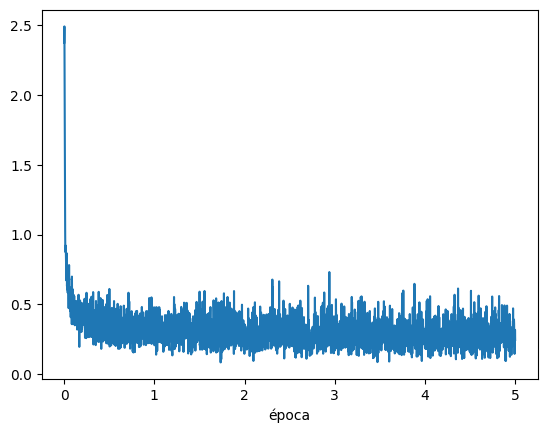

In [10]:
plt.plot(epochs, losses)
plt.xlabel('época')

### Visualização usual da perda, somente no final de cada minibatch

Text(0.5, 0, 'época')

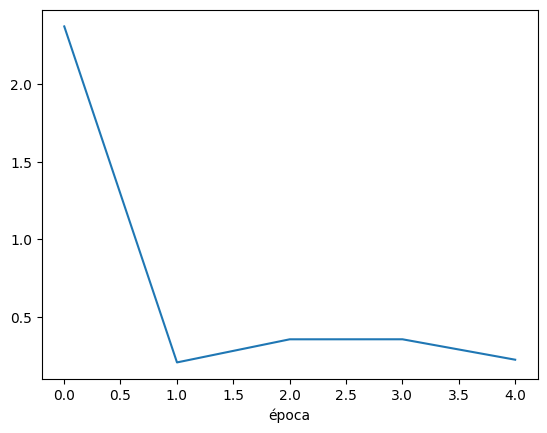

In [11]:
plt.plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
plt.xlabel('época')

# Atividades

## Perguntas

1. Qual é o tamanho do mini-batch?
- 100
2. Em uma época, quantos mini-batches existem?
- O dataset de treinamento MNIST tem 60000 amostras. Com um batch_size de 100, há 60000 / 100 = 600 mini-batches em uma época
3. Qual é a definição de época?
- Uma época (epoch) é uma passagem completa de todo o conjunto de dados de treinamento através do algoritmo de aprendizado de máquina. Durante uma época, cada amostra do conjunto de dados é processada pelo modelo pelo menos uma vez. Em modelos que utilizam treinamento por mini-batch, uma época consiste em um número de iterações, onde cada iteração processa um mini-batch dos dados.



## Exercícios


1. Coloque um print no final de cada minibatch, no mesmo estilo do print do final de época, no seguinte estilo:
    - Época: 1/4, batch: 600
2. Altere o tamanho de minibatch (batch_size) algumas vezes, refaça o treinamento, e compare no gráfico abaixo a queda da perda para cada tamanho de minibatch.

In [15]:
batch_sizes = [32, 100, 256, 512]
results = {}

for bs in batch_sizes:
    print(f"\nTrainando com batch_size: {bs}")
    epochs, losses = train_model(bs)
    results[bs] = {'época': epochs, 'perdas': losses}

print("Treinamento terminado para todos batch_size apontados.")


Trainando com batch_size: 32
Época: 1/5, batch: 1/1875, Loss: 2.3056
Época: 1/5, batch: 2/1875, Loss: 2.7864
Época: 1/5, batch: 3/1875, Loss: 2.2918
Época: 1/5, batch: 4/1875, Loss: 2.7545
Época: 1/5, batch: 5/1875, Loss: 2.8332
Época: 1/5, batch: 6/1875, Loss: 3.4151
Época: 1/5, batch: 7/1875, Loss: 1.7411
Época: 1/5, batch: 8/1875, Loss: 1.8895
Época: 1/5, batch: 9/1875, Loss: 1.1135
Época: 1/5, batch: 10/1875, Loss: 1.4055
Época: 1/5, batch: 11/1875, Loss: 1.0279
Época: 1/5, batch: 12/1875, Loss: 1.1229
Época: 1/5, batch: 13/1875, Loss: 1.1268


/usr/local/lib/python3.12/dist-packages/torchvision/datasets/mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


A saída de streaming foi truncada nas últimas 5000 linhas.
Época: 5/5, batch: 1648/1875, Loss: 0.1954
Época: 5/5, batch: 1649/1875, Loss: 0.2839
Época: 5/5, batch: 1650/1875, Loss: 0.3696
Época: 5/5, batch: 1651/1875, Loss: 0.2732
Época: 5/5, batch: 1652/1875, Loss: 0.1777
Época: 5/5, batch: 1653/1875, Loss: 0.1564
Época: 5/5, batch: 1654/1875, Loss: 0.2368
Época: 5/5, batch: 1655/1875, Loss: 0.2367
Época: 5/5, batch: 1656/1875, Loss: 0.3745
Época: 5/5, batch: 1657/1875, Loss: 0.3312
Época: 5/5, batch: 1658/1875, Loss: 0.2233
Época: 5/5, batch: 1659/1875, Loss: 0.2371
Época: 5/5, batch: 1660/1875, Loss: 0.3633
Época: 5/5, batch: 1661/1875, Loss: 0.2931
Época: 5/5, batch: 1662/1875, Loss: 0.1686
Época: 5/5, batch: 1663/1875, Loss: 0.7022
Época: 5/5, batch: 1664/1875, Loss: 0.2170
Época: 5/5, batch: 1665/1875, Loss: 0.1324
Época: 5/5, batch: 1666/1875, Loss: 0.0961
Época: 5/5, batch: 1667/1875, Loss: 0.4168
Época: 5/5, batch: 1668/1875, Loss: 0.1529
Época: 5/5, batch: 1669/1875, Loss: 0.

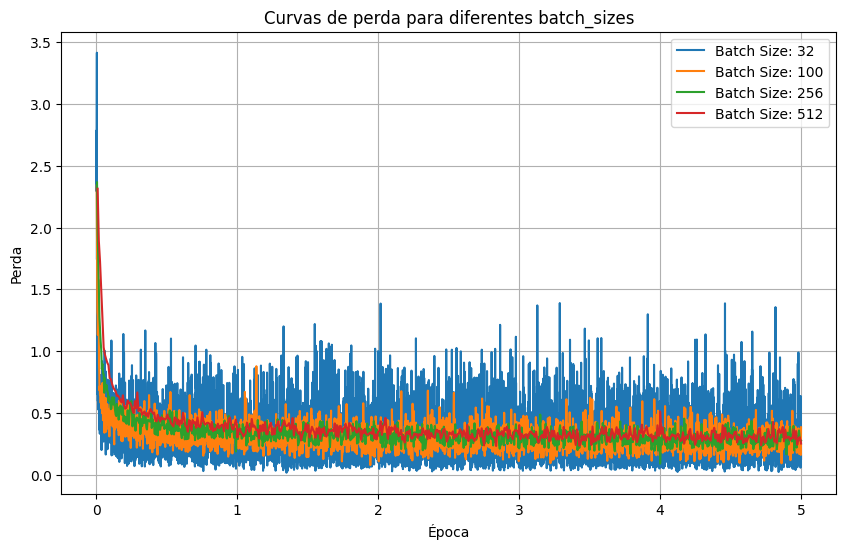

In [17]:
plt.figure(figsize=(10, 6))
for bs, data in results.items():
    plt.plot(data['época'], data['perdas'], label=f'Batch Size: {bs}')

plt.xlabel('Época')
plt.ylabel('Perda')
plt.title('Curvas de perda para diferentes batch_sizes')
plt.legend()
plt.grid(True)
plt.show()